You are owner or working at a company that sells ***luxury clothing***. and you have 
collected data on ***customer age, income, their annual spend*** at the business, and 
the ***number of days since their last purchase***.
You want to start targeted **marketing campaigns** but don't know how many different types of customers you have , and How to communicate with each Type of them.

In [1]:
#importing the required libraries 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import warnings
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA 

In [2]:
# importing the data to analyze 

file = 'C:\\Users\\Mohannad.dawood\\Desktop\\Data_science_Projects\\Clothing_Customers.csv'
data = pd.read_csv(file)
data.head(2)

,income,age,days_since_purchase,annual_spend
0,37453,48,504,4441
1,50775,50,566,4239


In [3]:
# Let us explore our data and looking for missing values 

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   income               1000 non-null   int64
 1   age                  1000 non-null   int64
 2   days_since_purchase  1000 non-null   int64
 3   annual_spend         1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


,income,age,days_since_purchase,annual_spend
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,72617.904000,41.443000,419.564000,4337.220000
std,39511.966589,10.845939,112.150665,1667.289632
min,0.000000,18.000000,141.000000,243.000000
25%,39635.500000,31.000000,310.000000,2747.500000
50%,60204.500000,45.000000,455.500000,4879.500000
75%,111329.250000,50.000000,510.000000,5681.250000
max,171935.000000,66.000000,636.000000,7572.000000


##### Our Data has 1000 records of customers with 4 features , and there are no missing values 
##### All the types of our values are integer, so there are not any categorial values , but they need to be standarized through StandardScale
##### Income has zero values , and we are not going to consider it as missing values since the customer maybe the decision maker but is not the source of the money like kidds.

# Standarization of the data 


In [4]:
scale_data = data.copy()
scaler = StandardScaler()
scale_data = scaler.fit_transform(scale_data)
scale_data


array([[-0.89042644,  0.6048606 ,  0.75325679,  0.06227588],
       [-0.55309405,  0.78935369,  1.30636116, -0.05893946],
       [-0.03977757, -0.04086522, -0.83468802,  0.89818165],
       ...,
       [ 0.24686127, -0.04086522,  0.46778356,  1.21142128],
       [ 0.03512329,  1.25058642,  0.67296744,  0.89758157],
       [-1.5080673 ,  0.6048606 ,  0.71757263,  0.46132637]])

# Determine the Right Number of Segmentations for the available data 

### First : Visualization Estimation 

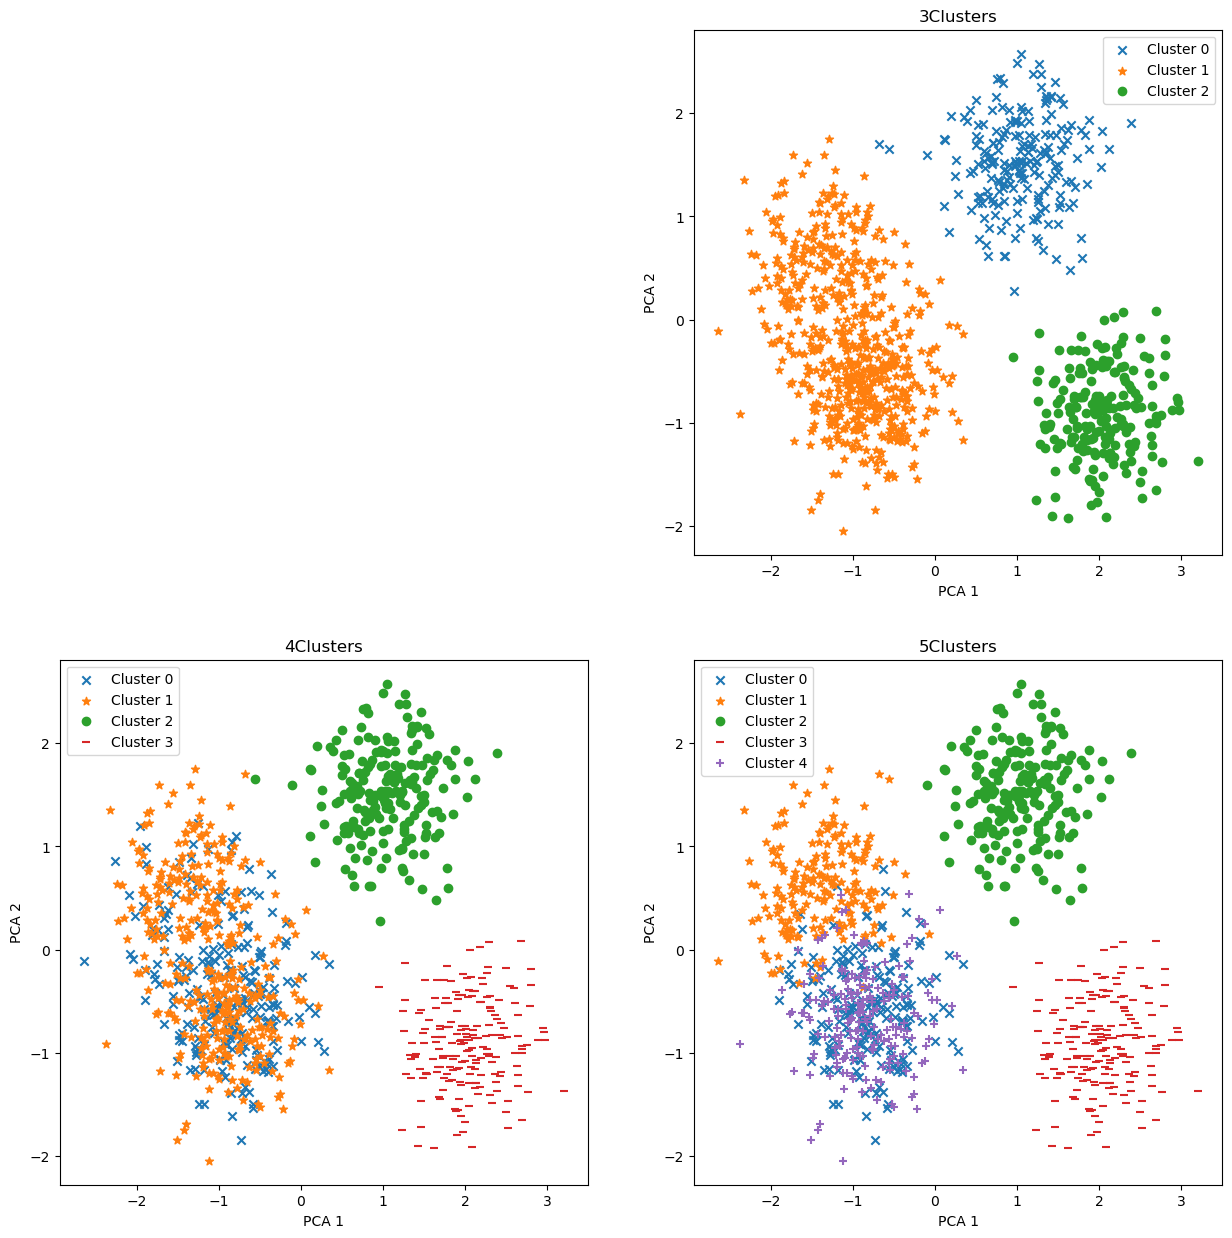

In [5]:
warnings.filterwarnings("ignore")
marks = ['x', '*', 'o','_','+']
fig= plt.figure(figsize=(15,15))
for n in range (3,6) :
    module = KMeans(n_clusters= n , random_state=42)
    module.fit_transform ( scale_data)
    data['group'] = module.predict(scale_data)
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(scale_data)
    data['pca1'] = data_pca[:,0]
    data['pca2'] = data_pca [:,1]
    plt.subplot(2,2,n-1)
    for clust in range(n):
        temp= data[data['group'] == clust]
        plt.scatter(temp['pca1'],temp['pca2'],marker=marks[clust], label="Cluster "+str(clust))
        plt.title(str(n)+'Clusters')
        plt.xlabel('PCA 1')
        plt.ylabel('PCA 2')
        plt.legend()
plt.show()

#### from the above visualization , it appears the right number of clustering is 3 Groups 
#### Let us confirm the Right Nomber of Segmentations through ELBOW method 
## Second ( Elbow Method)

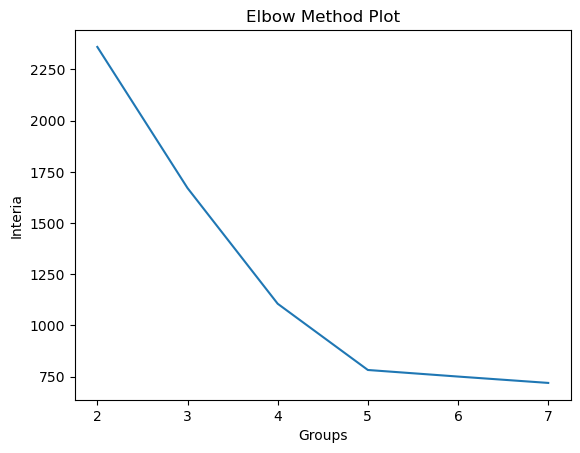

In [6]:
interia_Score = []
for n in range (2,8):
    interia = KMeans( n_clusters=n , random_state= 42 ).fit(scale_data).inertia_
    interia_Score.append(interia)
plt.plot(range (2,8),interia_Score)
plt.title ('Elbow Method Plot')
plt.xlabel('Groups')
plt.ylabel('Interia')
plt.show()

#### we found that clustering the customers for 5 segmentations is the best quantitive results 
#### so Let us discover how to understand the meaning of our clustering in both of our methods ( Visualization method , and Elbow quantitive method)

#### Study according to **Three Goups** of Customer Segmentations 

In [7]:
three_seg_module = KMeans(n_clusters= 3 , random_state= 42)
three_seg_module.fit_transform(scale_data)
data['group3'] = three_seg_module.predict(scale_data)
data.groupby('group3')['income', 'age','days_since_purchase','annual_spend'].mean().round(1) 

,income,age,days_since_purchase,annual_spend
group3,,,,
0,42477.2,30.1,501.3,2521.6
1,68309.8,49.3,433.6,5564.4
2,116310.5,29.3,294.1,2501.7


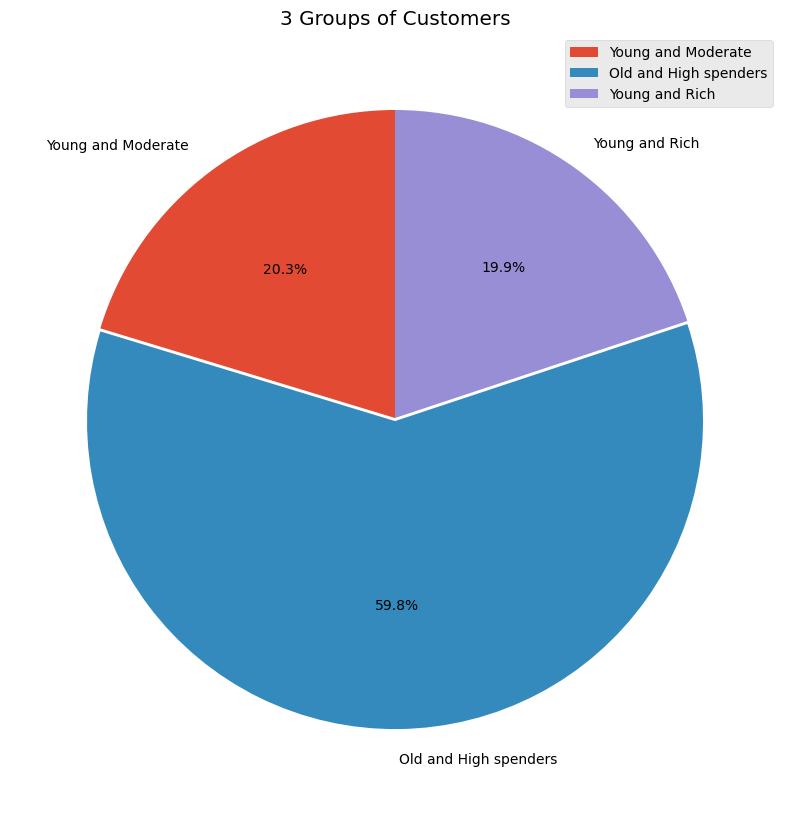

In [18]:
group3_names= ["Young and Moderate " , "Old and High spenders", "Young and Rich"]
fig=plt.figure(figsize=(10,10))
plt.style.use("ggplot")
slices = data.groupby('group3')['age'].count()
labels = group3_names
plt.pie(slices,labels=labels, explode=(0,0.01,0),autopct="%1.1f%%", startangle=90)
plt.title('3 Groups of Customers')
plt.legend(group3_names)
plt.show()

### Customers Groups :
- Group 0 :
    - Name : **Young and moderate **
    - count : 20% of customers
    - Age :average age 30 years old.
    - Income : average 42,477.00 yearly 
    - History : more than 1 year 
- Group 1 :
    - Name : **Old and High speners **
    - count : 60% of customers
    - Age :average age 49 years old.
    - Income : average 68,300.00 yearly 
    - History : more than 1 year 
- Group 2 :
    - Name : **Young and Rich **
    - count : 20% of customers
    - Age :average age 29 years old.
    - Income : average 116,300.00 yearly 
    - History : Less than 1 year 


# Conclusion :
- Group 1 is 60 % old and high spenders must be the first persona which need to be targeted with conversion compaign through offers and new collection to motivate their engagments and customer life time values.
- Group 2 20% young and rich is the second persona which need to envistigate and market study the competitors, and what are the barriers of this low marketshare.
- Group 2 need to be targeted by awareness compaign, and to solve the pinpoint and barriers of this segment.

#### Study according to **Five Goups** of Customer Segmentations 

In [ ]:
five_seg_module = KMeans(n_clusters= 5 , random_state= 42)
five_seg_module.fit_transform(scale_data)
data['group5'] = five_seg_module.predict(scale_data)
data.groupby('group5')['income', 'age','days_since_purchase','annual_spend'].mean().round(1) 

,income,age,days_since_purchase,annual_spend
group5,,,,
0,44331.1,48.9,297.5,5574.0
1,43101.8,50.1,505.2,5568.4
2,42643.6,30.0,500.6,2501.8
3,116310.5,29.3,294.1,2501.7
4,115626.5,48.9,498.5,5540.8


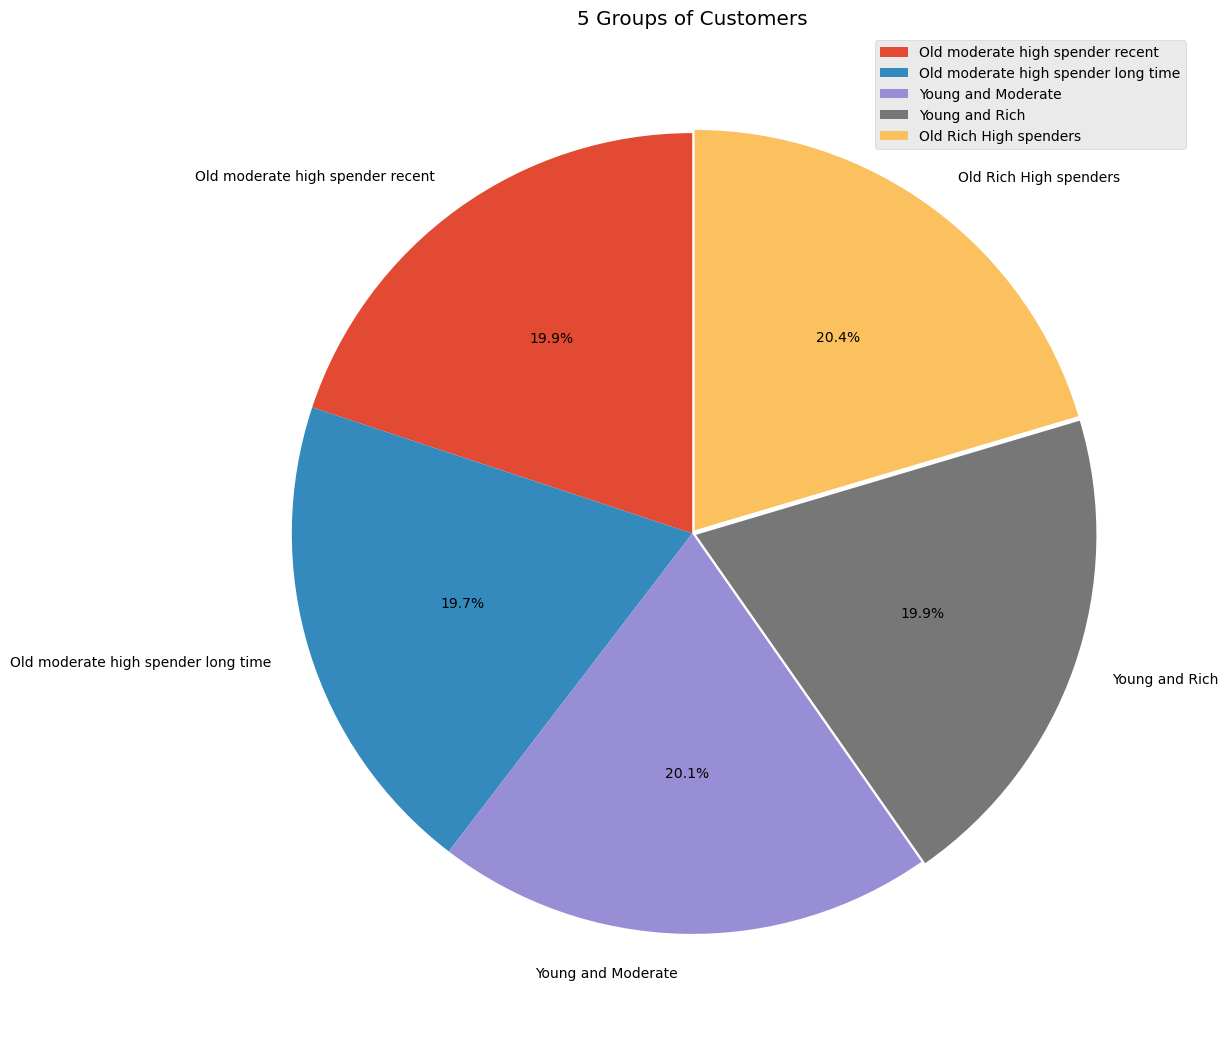

In [20]:
group5_names= ["Old moderate high spender recent" , "Old moderate high spender long time",  "Young and Moderate " ,  "Young and Rich", "Old Rich High spenders"]
fig=plt.figure(figsize=(13,13))
plt.style.use("ggplot")
slices = data.groupby('group')['age'].count()
labels = group5_names
plt.pie(slices,labels=labels, explode=(0,0,0,0.01,0.01),autopct="%1.1f%%", startangle=90)
plt.title('5 Groups of Customers')
plt.legend(group5_names)
plt.show()

## Custmers Groups :
- Group 0 : 
    - Name : Old moderate high spender recent
    - Need to retain this segments to maximize the average order values
- Group 1 : 
    - Name : Old moderate high spender long time  
    - Need to find out what are their barriers through competitors Study , and targeted accorrdingly
- Group 2 : 
    - Name : Young and Moderate 
    - need to be targeted with awareness compaign 
- Group 3 : 
    - Name : Young and Rich 
    - Need to be targeted through conversion compaign, by recognize them with offers such like Bundle and save promotions and loyality points, to encourage more sales and take the advantage of their purchase power.
- Group 4 : 
    - Name :Old Rich High spenders
    - Need to be targeted through conversion compaign, by recognize them with offers such like Bundle and save promotions and loyality points, to encourage more sales and take the advantage of their purchase power.
